<a href="https://colab.research.google.com/github/KapilNarayanSingh/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coronavirus Tweet Sentiment Analysis**
##Project Type - Classification
##Contribution - Team
### Team member 1 : Sudhanshu Chouhan
### Team member 2 : Kapil Narayan Singh













Import libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix as cm  
from sklearn.metrics import classification_report as cr  
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.utils import shuffle
import pylab as p



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/module 1/Classification/Coronavirus Tweets.csv', encoding="ISO-8859-1")

     

# Dataset First View

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


##Dataset Rows and Columns count

In [11]:
data.shape

(41157, 6)

## Dataset Information

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## Duplicate Values

In [13]:
data.duplicated().sum()

0

##Missing Values/Null Values Count

In [14]:
data.isna().sum().sort_values(ascending = False).head()

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
dtype: int64

<AxesSubplot:>

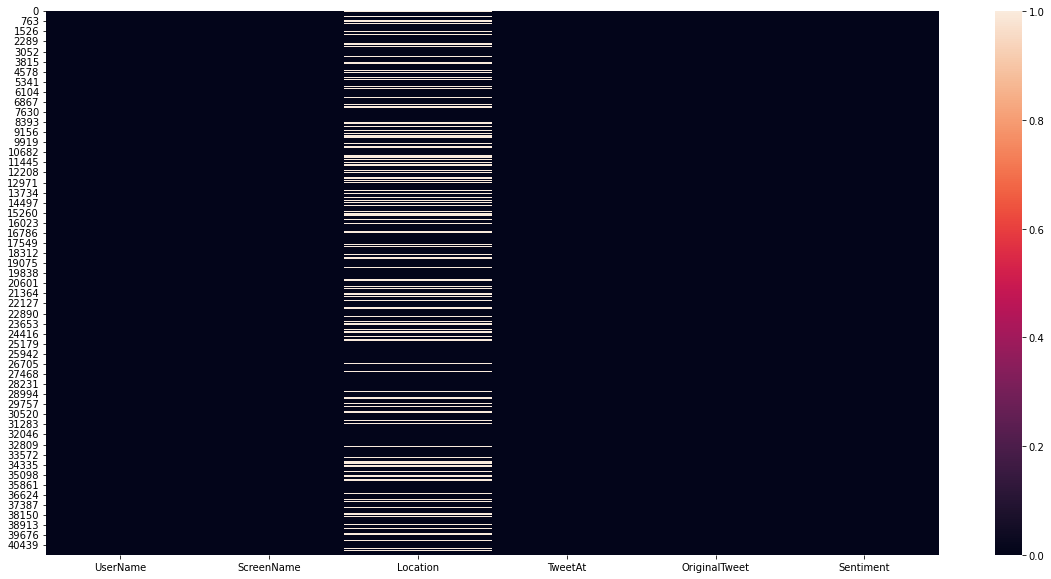

In [15]:
# let's plot a Heatmap to check the Nan values
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

## Knowing Dataset

##2.Understanding Variables

In [16]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [17]:
data.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


Variable Description
1.Username is Coded Username

2.ScreenName is Coded Screen name

3.Location is Region of origin of tweet.

4.Tweet at is Tweet timing.

5.OriginalTweet is First tweet in the thread.

6.Sentiment which is target Variable.

##Checking Unique values for each Variables.

In [18]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [19]:
data.Location.nunique()

12220

From this we get to know that unique value is relevant for only sentiment column or target variable.

#Data Wrangling

##Data Wrangling Code

In [20]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


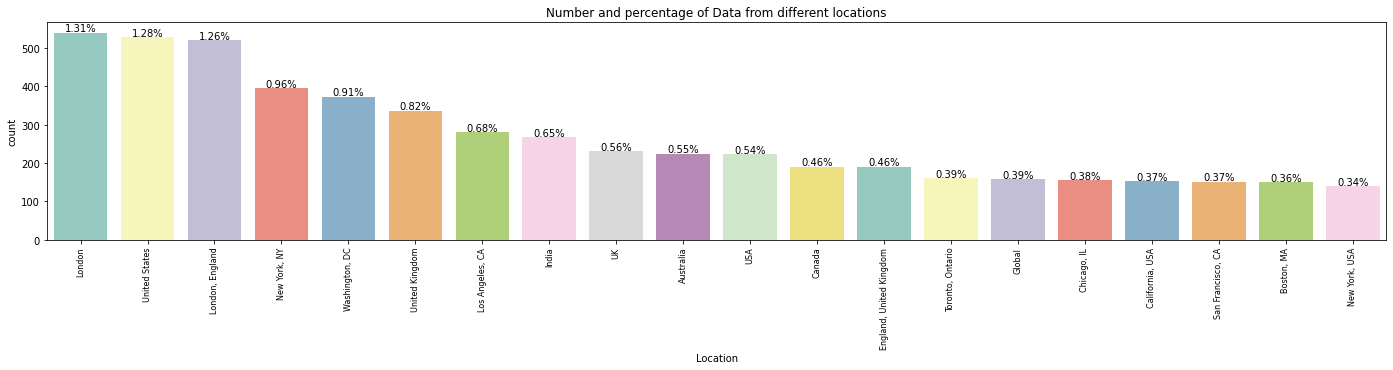

In [21]:
# Percentage of data from different locations
data_source("Location", "Data from different locations", data, 6)
     

The above observation shows that the number of data percentage wise from each country that of total data present.

In [22]:

# Plot unique value across different colums
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe
     

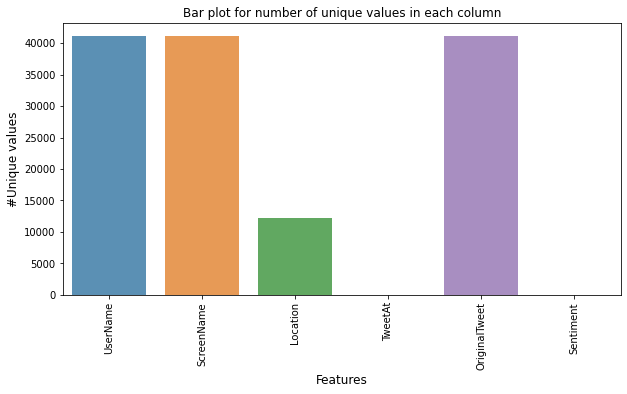

In [23]:
unique_data = unique_values(data)
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=unique_data['Features'], y=unique_data['Uniques'], alpha=0.8)
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The number of unique value in different feature are as followed Username , ScreenName , OriginalTweet has unique values of around 40000 then followed by Location that is between 10000-15000. 

#Sample text of Sentiment.

In [24]:
data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

##Here we can see that the number of positive sentiment is highest.

In [25]:
data[data['Sentiment'] == 'Neutral']['OriginalTweet'].sample(10)

12459    How do you think COVID-19 started?\r\r\n\r\r\n...
22010    Greenville Online: Grocery stores: What you ne...
20325    @business Still many more to go on the site.. ...
28360    "the advent of COVID-19 reveals flaws in our f...
31208    Unboxing Haul !!! | Online shopping during thi...
25636    Global #payments giant #Visa says consumer spe...
13224    BUY LOCAL |  Not able to get your supplies fro...
930      Me when I cough at the grocery store #coronavi...
32534    @joelockhart @JamesGleick How about some quest...
2886     $KOPN COVID-19 just spawned mass market for VR...
Name: OriginalTweet, dtype: object

In [26]:
data[data['Sentiment'] == 'Extremely Positive']['OriginalTweet'].sample(10)

4720     Good piece in @Forbes on the lasting effect of...
24568    Not sure if this is true, but there has been a...
37534    @MMAglobal has launched a COVID-19 Marketer Su...
23535    A popular grocery store in Bolton temporarily ...
2116     Mark Hayward &amp; David Cox said "it's vital ...
38566    I used to spin toilet paper like I was spinnin...
9889     So you're advised not to go to restaurants, pu...
23092    @narendramodi \r\r\nHello,sir I am gourav vish...
30376    @MisaJC Yes! Highly recommend. Prices on them ...
27230    Tomorrow marks the end of my two week #covid_1...
Name: OriginalTweet, dtype: object

In [27]:
data[data['Sentiment'] == 'Positive']['OriginalTweet'].sample(10)

21159    Don't order toilet paper from wish. \r\r\n\r\r...
496      Clubs shut down\r\r\nBars shut down\r\r\nResta...
21428    A #Safeway supermarket in #California is out o...
1046     people from pioneer days are rolling over in g...
10913    If you want to buy a devics with @TelkomZA don...
39177    Now that the Easter milestone has arrived howÂ...
9407     The more individuals work from home - the grea...
37087    It's important to understand how your business...
16165    Me cooking for the next month because Karen st...
19653    What a novel idea. -&gt; #FingerLakes winery o...
Name: OriginalTweet, dtype: object

In [ ]:
data[data['Sentiment'] == 'Extremely Negative']['OriginalTweet'].sample(10)

In [29]:
data[data['Sentiment'] == 'Negative']['OriginalTweet'].sample(10)

39215    ItÂs a disaster, food banks have had a six fo...
34194    What Shoppers Buying Online During #COVID19: T...
30316    It's SO frustrating finding empty shelves wher...
10072    Brit in Barcelona coronavirus lockdown shares ...
7012     @elonmusk https://t.co/OC0PoAXhHH Both the mas...
3321     We actually didnÂt hoard anything- or over bu...
24750    Coronavirus Update Supply Chain Food Shortages...
4469     Oil prices are plunging even more today. bad n...
19445    This means people who are confirmed as having ...
18284    My online orders from the height of my COVID-1...
Name: OriginalTweet, dtype: object

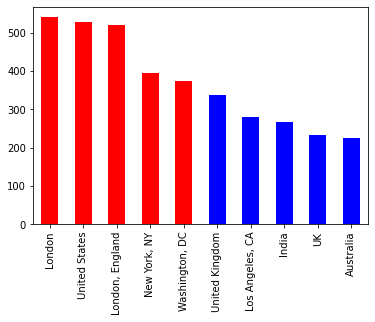

In [30]:
from matplotlib.figure import figaspect
country_location = data['Location'].value_counts().index

colors_location = ['red' if (x in country_location[:5]) else 'blue' for x in country_location]


data['Location'].value_counts()[0:10].plot(kind='bar',alpha =1,color=colors_location);


In [31]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 4.1 MB/s eta 0:00:00


In [32]:
import neattext.functions as nfx

In [33]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [34]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_urls)


In [35]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
192,Joining hands with the UAE's efforts to contai...,Joining hands with the UAE's efforts to contai...
11805,While many stocks are suffering losses as a re...,While many stocks are suffering losses as a re...
11118,"If you're healthy, stay in. If you're not well...","If you're healthy, stay in. If you're not well..."
3351,"Contrary to popular belief, COVID-19 is not kn...","Contrary to popular belief, COVID-19 is not kn..."
18690,.@GovHerbert:\r\r\n\r\r\nI have observed that ...,.@GovHerbert:\r\r\n\r\r\nI have observed that ...
25140,She thought she had a Cold' #NewZealand 's fir...,She thought she had a Cold' #NewZealand 's fir...
11360,Parents: *Trying their hardest to prepare a m...,Parents: *Trying their hardest to prepare a m...
29396,The ongoing COVID-19 pandemic is having some i...,The ongoing COVID-19 pandemic is having some i...
22917,Weak consumer and industry demand has brought ...,Weak consumer and industry demand has brought ...
4813,@kroger #kroger You should only do online orde...,@kroger #kroger You should only do online orde...


In [36]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_numbers)

In [37]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
31381,All these people who think #socialdistancing i...,All these people who think #socialdistancing i...
4593,@suzydymna @RealJamesWoods Chinese Virus ... l...,@suzydymna @RealJamesWoods Chinese Virus ... l...
4977,Coronavirus will reshape retail and consumer l...,Coronavirus will reshape retail and consumer l...
4754,As the situation w/ COVID-19 continues to evol...,As the situation w/ COVID- continues to evolve...
27037,Last time I saw toilet paper on a supermarket ...,Last time I saw toilet paper on a supermarket ...
14647,Supermarket In Denmark Uses Price Trick To Sto...,Supermarket In Denmark Uses Price Trick To Sto...
6472,@saveonfoods Thanks for making changes for the...,@saveonfoods Thanks for making changes for the...
6106,PSA from a grocery store worker STOP BUYING BA...,PSA from a grocery store worker STOP BUYING BA...
2769,Surely their should be some sort of law agains...,Surely their should be some sort of law agains...
1320,The next person to say Âcalm downÂ after bul...,The next person to say Âcalm downÂ after bul...


In [38]:
data['neat_tweet'] = data['OriginalTweet'].str.lower()

In [39]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
26102,"#coronavirus quick take: crime down, new baby ...","#coronavirus quick take: crime down, new baby ..."
28860,It s time to institute standard safety practic...,it s time to institute standard safety practic...
18755,"Break isolation or 2 metre distance rules, ins...","break isolation or 2 metre distance rules, ins..."
30539,All net proceeds from this weekÂs online auct...,all net proceeds from this weekâs online auct...
5259,Daily #Covid19scorecard B-\r\r\n\r\r\nMultipl...,daily #covid19scorecard b-\r\r\n\r\r\nmultipl...
27587,"It's clearer than a sunny day now ? farmers, n...","it's clearer than a sunny day now ? farmers, n..."
11119,Now is the time to start campaigning for super...,now is the time to start campaigning for super...
21168,@Siberyn3 @Stephan29557232 @GlobalCalgary It's...,@siberyn3 @stephan29557232 @globalcalgary it's...
32037,Prof of Psychology Gail Sahar sheds light on h...,prof of psychology gail sahar sheds light on h...
1274,On the bright side of plague-mageddon gas pric...,on the bright side of plague-mageddon gas pric...


In [40]:
 data['extracted_hashtags']=data['OriginalTweet'].apply(nfx.extract_hashtags)

In [41]:
data.loc[:,['OriginalTweet','extracted_hashtags']].sample(10)

,OriginalTweet,extracted_hashtags
2960,A bunch of grocery stores are changing their h...,[]
31724,Online shopping Hospitality and tourism Tr...,[]
8674,As Army Families take heed of COVID 19 precaut...,[]
4566,I'm watching today's update from the covid-19 ...,[]
22977,The last coal plant in New York retires as the...,[]
4962,God Help Us. You have royally screwed this up...,[]
8454,WTF is wrong with people? A pharmacy chain in ...,[#ShutThemDown]
7695,"In light of the current COVID-19 situation, we...",[]
3271,During a time when thousands are stocking up o...,[]
30857,Why would you allow 200 people at a time into ...,"[#sos, #coronavirus]"


In [42]:
data['neat_tweet']=data['OriginalTweet'].apply(nfx.remove_hashtags)

In [43]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
38980,Q: Why aren't grocery stores or retailers repo...,Q: Why aren't grocery stores or retailers repo...
35791,@Canon_India .@Canon_India never fails 2 surpr...,@Canon_India .@Canon_India never fails 2 surpr...
16768,"Oil is phasing out, and the virus is speeding ...","Oil is phasing out, and the virus is speeding ..."
35332,A woman has been arrested after licking US 1 8...,A woman has been arrested after licking US 1 8...
17265,Can someone just make a Video of how to do Hom...,Can someone just make a Video of how to do Hom...
7424,"I have the best big sister ever, sheÂs bringi...","I have the best big sister ever, sheÂs bringi..."
30866,ItÂs 8:00pm on Sunday night and you walk into...,ItÂs 8:00pm on Sunday night and you walk into...
23926,Eighteen new imported cases were reported in t...,Eighteen new imported cases were reported in t...
8120,Condolences to those who have lost a loved one...,Condolences to those who have lost a loved one...
10695,Today's Free Books on Kindle https://t.co/5ugX...,Today's Free Books on Kindle https://t.co/5ugX...


In [44]:
data['neat_tweet']=data['neat_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [45]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
19028,Why has there not been a ban placed on Short S...,Why has there not been a ban placed on Short S...
36889,More small businesses hurt Farmers Dump Milk B...,More small businesses hurt Farmers Dump Milk B...
23271,@illBlissGoretti Covid 19\r\r\n@illBlissGorett...,Covid 19\r\r\n no give away for this period...
40336,Why wouldnÂt the govt buy the food &amp; pay ...,Why wouldnÂt the govt buy the food &amp; pay ...
2210,You know what else is annoying about this whol...,You know what else is annoying about this whol...
5499,one more person says Covid 19 is aNtI CaPiTaLi...,one more person says Covid 19 is aNtI CaPiTaLi...
35076,Going to try and sleep. Must to go to grocery ...,Going to try and sleep. Must to go to grocery ...
23899,Queues at 9am this morning equally long for am...,Queues at 9am this morning equally long for am...
24617,Our Division of Consumer Affairs has been chas...,Our Division of Consumer Affairs has been chas...
1836,#COVID2019 I'm off down the supermarket to co...,I'm off down the supermarket to cough on an...


In [46]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_multiple_spaces)

In [47]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_urls)

In [48]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_puncts)

In [49]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
22637,Investment in Australian wind and solar projec...,Investment in Australian wind and solar projec...
720,Malaysia announced restricted movement re COVI...,Malaysia announced restricted movement re COVI...
16685,"The cheapest #coronavirus cure, out there, all...",The cheapest cure out there all you need is
21190,My 1 wish when we are through this is that the...,My 1 wish when we are through this is that the...
39221,@ArvindKejriwal \r\r\nSir only your govt has g...,Sir only your govt has given benefit to middl...
31541,@manziniking @AdvoBarryRoux @MTNza @TelkomZA I...,I dont know what ICASAs role is same to compe...
21494,@BorisJohnson ...then they are going home to t...,then they are going home to their families bl...
35159,Great article by @VICE on @HEB's pandemic prep...,Great article by on pandemic preparedness
11244,The current run on toilet paper demonstrates t...,The current run on toilet paper demonstrates t...
1710,The process of online shopping really does mea...,The process of online shopping really does mea...


In [50]:
data['neat_tweet'] = data['neat_tweet'].apply(lambda x: nfx.remove_stopwords(x,lang='en'))

#**Tokenization**

In [51]:
tokenized_tweet = data['neat_tweet'].apply(lambda x: x.split())

In [52]:
tokenized_tweet.sample(3)

6685     [feel, like, leapfrogging, fourth, industrial,...
25144    [Check, data, news, today, weÂve, shedding, l...
35706    [Information, Note, Implications, COVID19, Con...
Name: neat_tweet, dtype: object

In [53]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [54]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [55]:
data['neat_tweet'] = tokenized_tweet

#**Wordplay**

In [60]:
pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=0aa2d32268d22382dd3ae2b4ff31ca96a986f6d91472bfa86afe1ca2f1367501
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [62]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from wordcloud import WordCloud

import wikipedia


In [ ]:
from PIL import Images to

In [66]:
all_words = ' '.join(text for text in data['neat_tweet'])

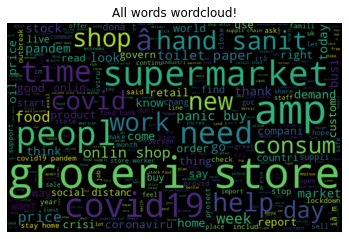

In [67]:
all_words_cloud = WordCloud(width=800, height=500, max_font_size=200,max_words=300).generate(all_words)

plt.title('All words wordcloud!')
plt.imshow(all_words_cloud, interpolation="bilinear")
plt.axis('off');

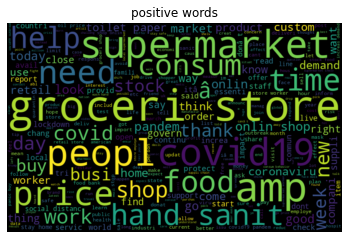

In [68]:
positive_words = ' '.join(text for text in data[data['Sentiment']=='Positive']['neat_tweet'])


positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(positive_words)

plt.title('positive words')
plt.imshow(positive_words_cloud, interpolation="bilinear")
plt.axis('off');

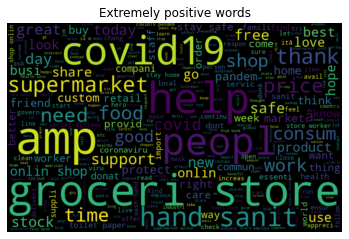

In [69]:
extremly_positive_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Positive']['neat_tweet'])


extremly_positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_positive_words)

plt.title('Extremely positive words')
plt.imshow(extremly_positive_words_cloud, interpolation="bilinear")
plt.axis('off');

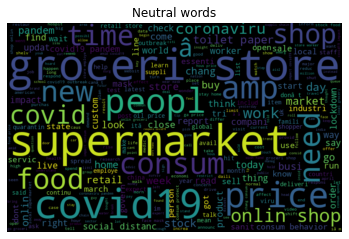

In [70]:
neutral_words = ' '.join(text for text in data[data['Sentiment']=='Neutral']['neat_tweet'])


neutral_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(neutral_words)

plt.title('Neutral words')
plt.imshow(neutral_words_cloud, interpolation="bilinear")
plt.axis('off');

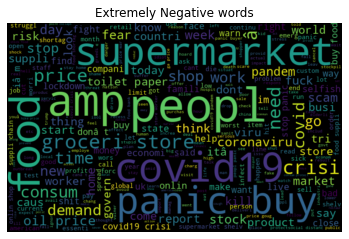

In [71]:
extremly_negative_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Negative']['neat_tweet'])


extremly_negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_negative_words)

plt.title('Extremely Negative words')
plt.imshow(extremly_negative_words_cloud, interpolation="bilinear")
plt.axis('off');

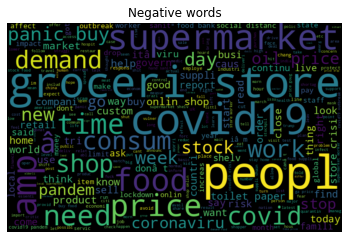

In [72]:
negative_words = ' '.join(text for text in data[data['Sentiment']=='Negative']['neat_tweet'])


negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(negative_words)

plt.title('Negative words')
plt.imshow(negative_words_cloud, interpolation="bilinear")
plt.axis('off');

In [73]:
data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet'],axis =1,inplace=True)

In [74]:
X = data['neat_tweet']
y = data['Sentiment']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [76]:
print(f'train shape { X_train.shape} and { y_train.shape} ')
print(f'test shape { X_test.shape} and { y_test.shape} ')

train shape (32925,) and (32925,) 
test shape (8232,) and (8232,) 


In [77]:
data['neat_tweet'].isnull().sum()

0

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [80]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.7000151860288535
Validation accuracy Score :  0.46379980563654033
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.62      0.46       655
Extremely Positive       0.41      0.59      0.49       936
          Negative       0.51      0.42      0.46      2416
           Neutral       0.29      0.67      0.40       670
          Positive       0.61      0.39      0.48      3555

          accuracy                           0.46      8232
         macro avg       0.44      0.54      0.46      8232
      weighted avg       0.52      0.46      0.47      8232



In [81]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy[i]) 
print(test_accuracy[i] )

0.3136826119969628
0.2597181729834791


In [82]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score   : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score   :  0.8365072133637054
Validation accuracy Score :  0.5773809523809523
                    precision    recall  f1-score   support

Extremely Negative       0.68      0.67      0.67      1115
Extremely Positive       0.70      0.65      0.67      1417
          Negative       0.45      0.50      0.48      1763
           Neutral       0.79      0.59      0.68      2063
          Positive       0.43      0.52      0.47      1874

          accuracy                           0.58      8232
         macro avg       0.61      0.59      0.59      8232
      weighted avg       0.60      0.58      0.59      8232



In [83]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier(tree_method='hist')

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

ValueError: ignored

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
               'Naive Bayes', 
              'Stochastic Gradient Decent','xgboost',],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
               NB_accuracy, 
              sgd_accuracy,xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

In [ ]:
data_bin = data.copy()

In [ ]:
data_bin['Sentiment'] = data_bin['Sentiment'].apply(lambda x: 1 if (x=='Positive' or x== 'Extremely Positive' or x== 'Neutral' ) else 0)

In [ ]:
data_bin['Sentiment'].value_counts()

In [ ]:
X= data_bin['neat_tweet']
y = data_bin['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [ ]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Test accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Test accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

In [ ]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Test accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
# Confusion matrix for training set with SGDclassifier
train_preds = sgd_clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train,train_preds),annot= True);

In [ ]:
sns.heatmap(confusion_matrix(y_test,sgd_prediction),annot= True);